**Imoprt Important Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


**Load The Dataset**

In [2]:

df = pd.read_csv("/content/Housing.csv")

# Display the first 5 rows

print(df.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


**Data Preprocessing**

In [3]:
# Convert 'yes'/'no' columns to binary (1/0)
binary_columns = ['mainroad', 'guestroom', 'basement',
                  'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_columns] = df[binary_columns].replace({'yes': 1, 'no': 0})




/tmp/ipython-input-3-264696068.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace({'yes': 1, 'no': 0})


In [4]:
# One-hot encode 'furnishingstatus'
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

print("\nFirst 5 rows after preprocessing:")
print(df.head())


First 5 rows after preprocessing:
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                            False                      

**Define feature and Target**

In [5]:
# Define X (features) and y (target)
X = df.drop('price', axis=1)
y = df['price']


**Split the Dataset into Training and Testing Sets**

In [6]:
# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split


In [7]:
# X = all features (columns used to predict price)
# y = target (price column)
# These should already be defined like this:
# X = df.drop('price', axis=1)
# y = df['price']


In [8]:
# Split the dataset into training and testing sets
# test_size=0.2 means 20% for testing, 80% for training
# random_state=42 ensures results are the same every time you run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Print the shape of training data
print("Training data (X_train) shape:", X_train.shape)


Training data (X_train) shape: (436, 13)


In [10]:
# Print the shape of testing data
print("Testing data (X_test) shape:", X_test.shape)


Testing data (X_test) shape: (109, 13)


In [12]:
print(X_test.head())


     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
316  5900         4          2        2         0          0         1   
77   6500         3          2        3         1          0         0   
360  4040         2          1        1         1          0         0   
90   5000         3          1        2         1          0         0   
493  3960         3          1        1         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  \
316                0                0        1         0   
77                 0                1        0         1   
360                0                0        0         0   
90                 0                1        0         0   
493                0                0        0         0   

     furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
316                            False                          True  
77                             False                    

In [13]:
print(X_train.head())

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
46   6000         3          2        4         1          0         0   
93   7200         3          2        1         1          0         1   
335  3816         2          1        1         1          0         1   
412  2610         3          1        2         1          0         1   
471  3750         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  \
46                 0                1        1         0   
93                 0                1        3         0   
335                0                1        2         0   
412                0                0        0         1   
471                0                0        0         0   

     furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
46                             False                         False  
93                              True                    

In [14]:
print(y_test.head())

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
Name: price, dtype: int64


In [15]:
print(y_train.head())

46     7525000
93     6300000
335    3920000
412    3430000
471    3010000
Name: price, dtype: int64


**Train the Linear Regression Model**

In [16]:
from sklearn.linear_model import LinearRegression


In [17]:
# Create an instance of the LinearRegression model
model = LinearRegression()


In [18]:
# Train the model using the training data
model.fit(X_train, y_train)


LinearRegression()

In [19]:
# Show the intercept (b₀ in y = b₀ + b₁x₁ + b₂x₂ + ...)
print("Intercept:", model.intercept_)


Intercept: 260032.35760741122


**Step-by-Step Code for Model Evaluation:**

In [20]:
# Use the trained model to predict house prices for the test set
y_pred = model.predict(X_test)


In [21]:
# Mean Absolute Error (average of absolute errors)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 970043.4039201637


In [22]:
# Mean Squared Error (penalizes large errors more)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 1754318687330.6633


In [23]:
# R-squared (how much variance in price is explained by the model)
r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)


R-squared (R²): 0.6529242642153185


**Plotting the Regression Results.**

In [24]:
import matplotlib.pyplot as plt


In [25]:
# Set the size of the plot (width=8 inches, height=6 inches)
plt.figure(figsize=(8, 6))


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

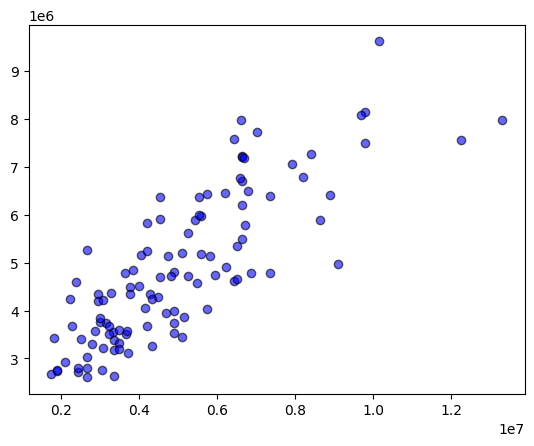

In [26]:
# Create a scatter plot: actual prices vs predicted prices
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)


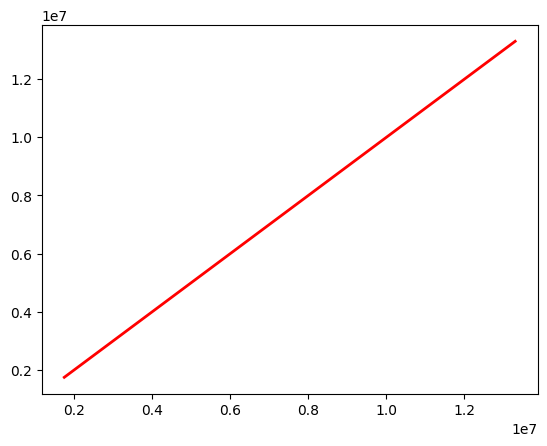

In [27]:
# Plot a red diagonal line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)


Text(0.5, 1.0, 'Actual vs Predicted House Prices')

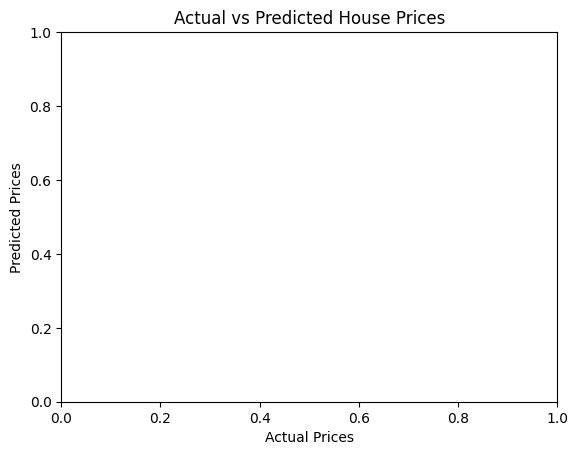

In [28]:
# Label the axes and add a title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')


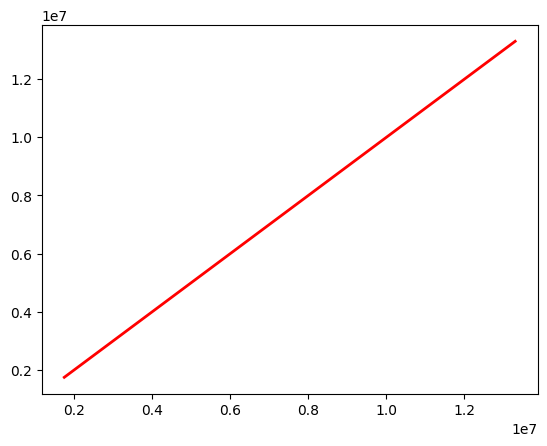

In [29]:
# Plot a red diagonal line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)


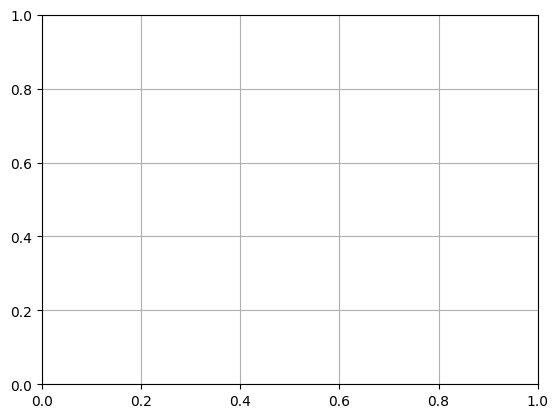

In [30]:
# Add grid lines to the plot
plt.grid(True)


In [32]:
# Display the plot
plt.show()
